In [14]:
import numpy as np
import scipy as sci
from PIL import Image

import scipy.fft as fft

import matplotlib.pyplot as plt

import cv2 as cv

# FUNCTION`S CREATED FROM   'INTRO'
def middle_section(arr):
    """
    for plt.plot. Can be colored or not.
    """
    mid_row=int((arr.shape)[0]/2)
    if len(arr.shape) == 3 :
        return (arr[mid_row,:,0:1]).flatten()
    else:
        return((arr[mid_row,:]).flatten())
def convolve_2d(arr,flt):
    """
    filter designed to be 3x3
    """
    conv=np.empty(((arr.shape)[0]-2,(arr.shape)[1]-2))
    for i in (range(arr.shape[0]))[1:-1]:
        in1=np.convolve(arr[i-0,:],flt[0,:],'valid')
        in2=np.convolve(arr[i,:],flt[1,:],'valid')
        in3=np.convolve(arr[i+1,:],flt[2,:],'valid')
        conv[i-1,:]=(in1+in2+in3)
    return conv

def im_asrankn(arr,n):
    """
    pull the first n rank-1 part of the array. with SVD.
    designed for NON-colored image
    """
    U,E,V=np.linalg.svd(arr)
    ans=np.zeros(arr.shape)
    for i in range(n):
        ans+=(U[:,i:i+1]@V[i:i+1,:])*E[i]
    return ans
def gaussian_filter2d(piv,mean=0,sigma=1,normal=False):
    loc=np.square((np.arange(-(piv-1)/2,((piv-1)/2)+1)).reshape((piv,1)))
    temp=np.concatenate(piv*[loc],axis=1)
    x=temp+temp.T
    z=(1/(2*np.pi*sigma**2))*np.exp((-1*np.square(x-mean))/(2*np.square(sigma)))
    if normal:
        return (z-z.mean())
    return z


#rng=np.random.default_rng(seed=42)

#ccarr1=Image.open('pexels-deva-darshan-1123972.jpg')

In [12]:
d1cc=np.mean(ccarr1,-1)

In [7]:
fft_im=fft.fftshift(fft.fft2(d1cc))

In [24]:
w=np.atleast_2d(fft.fftfreq(800,2*np.pi/800))

In [25]:
w_row=np.concatenate((800*[w]),axis=0)
w_col=np.concatenate((800*[w.T]),axis=1)

In [40]:
fft_der_row=fft_im*w_row*1j
fft_der_col=ffm*w_col*1j
der_row=fft.ifft2(fft.ifftshift(der_row))
der_col=fft.ifft2(fft.ifftshift(der_col))

In [81]:
grad_direction=np.arctan(der_col/der_row)

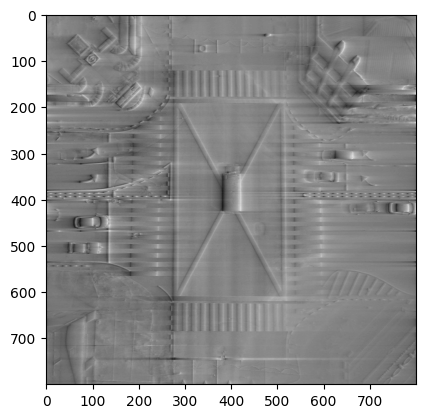

In [120]:
plt.imshow(np.real(der_row),cmap='gray')

In [125]:
grad_magnitute=np.sqrt((der_col**2)+(der_row**2))

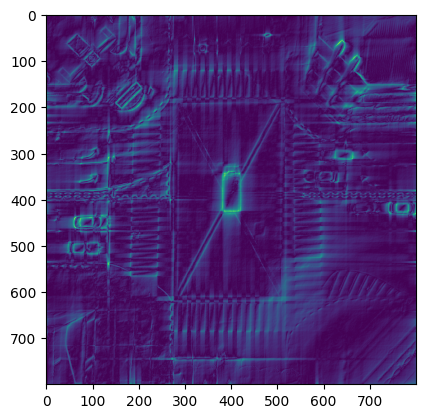

In [131]:
plt.imshow((np.real(grad_magnitute)))

In [235]:
diff=np.cos(np.arange(0,100*np.pi,np.pi))*np.exp(-np.linspace(0,5,100))

224.33333333333334

/tmp/ipykernel_769/3512386736.py:1: DeprecationWarning: Please use `gaussian_gradient_magnitude` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  plt.imshow(sci.ndimage.filters.gaussian_gradient_magnitude(d1cc,5))


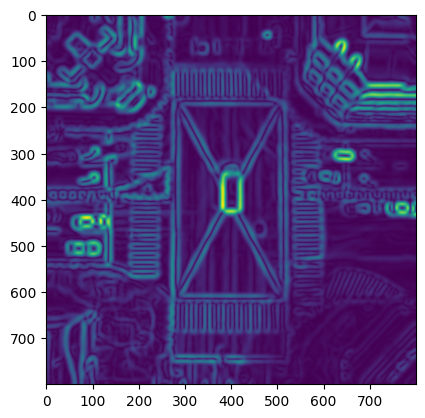

In [260]:
plt.imshow(sci.ndimage.filters.gaussian_gradient_magnitude(d1cc,5))

In [427]:
flt=gaussian_filter2d(100,sigma=800,normal=True)

In [428]:
flt.min()

-7.828732857421648e-08

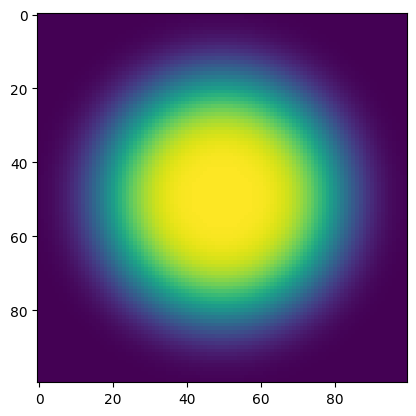

In [429]:
plt.imshow(flt)

In [430]:
fft_gaus=fft.fftshift(fft.fft2(flt))

In [431]:
derivative=1j*(np.atleast_2d(fft.fftfreq(100,2*np.pi/100)).T@np.atleast_2d(fft.fftfreq(100,2*np.pi/100)))
#derivative=fft.fftshift(derivative)

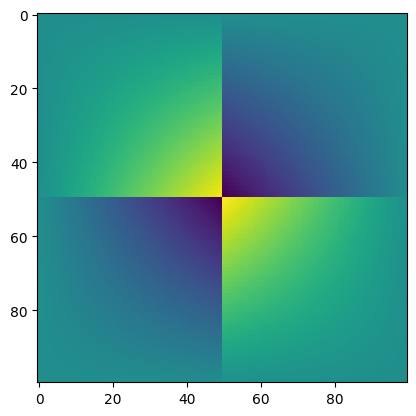

In [432]:
plt.imshow((np.imag(((derivative)))))

In [433]:
first_y=derivative*fft_gaus
second_y=derivative*first_y
z=fft.ifft2(fft.ifftshift(first_y))
z2=fft.ifft2(fft.ifftshift(second_y))

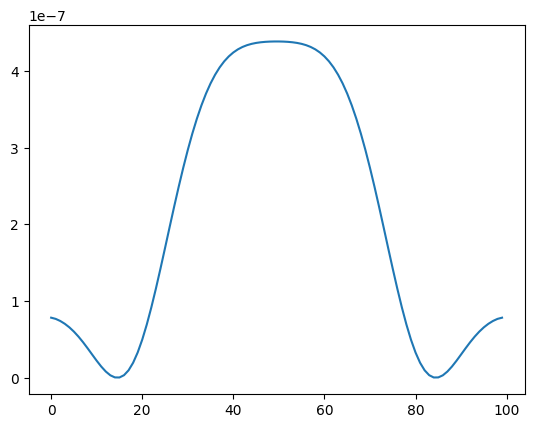

In [438]:
plt.plot(middle_section(np.real((z2*z2.conj()))))

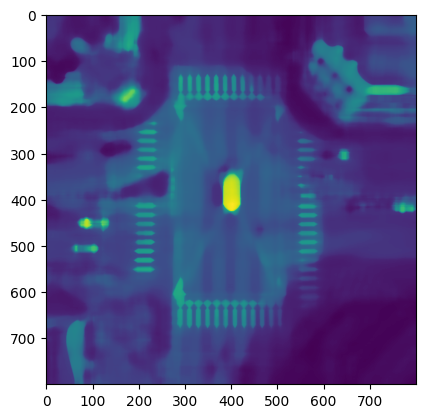

In [445]:
plt.imshow(sci.ndimage.median_filter(d1cc,(30,30)))